## Task 5: Classification Tasks Overview 

# Task 1: Student Pass/Fail Prediction
# Objective:
- Predict whether a student will pass or fail based on their study hours and attendance.

# Step 1: Import Required Libraries
- pandas: load & handle CSV data
- numpy: numerical operations
- matplotlib: visualization
- train_test_split: split data into training/testing
- LogisticRegression: classification model
- accuracy_score, confusion_matrix: evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load Dataset
- Reads the CSV file using .read_csv()
- .head() shows first 5 rows

In [2]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-5\Task-1\Dataset\student_performance_dataset.csv")
df.head()

,Student_ID,Gender,Study_Hours,Attendance,Past_Exam_Scores,Final_Exam_Score,Pass,Pass_numeric
0,S147,Male,31,68.267841,86,63,Pass,1
1,S136,Male,16,78.222927,73,50,Fail,0
2,S209,Female,21,87.525096,74,55,Fail,0
3,S458,Female,27,92.076483,99,65,Pass,1
4,S078,Female,37,98.655517,63,70,Pass,1


# Step 3: Data Exploration
- info(): datatype & column info
- isnull().sum(): check missing values

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        708 non-null    object 
 1   Gender            708 non-null    object 
 2   Study_Hours       708 non-null    int64  
 3   Attendance        708 non-null    float64
 4   Past_Exam_Scores  708 non-null    int64  
 5   Final_Exam_Score  708 non-null    int64  
 6   Pass              708 non-null    object 
 7   Pass_numeric      708 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 44.4+ KB


Student_ID          0
Gender              0
Study_Hours         0
Attendance          0
Past_Exam_Scores    0
Final_Exam_Score    0
Pass                0
Pass_numeric        0
dtype: int64

# Step 4: Data Visualization
- Scatter plot shows relationship
- Color represents Pass/Fail

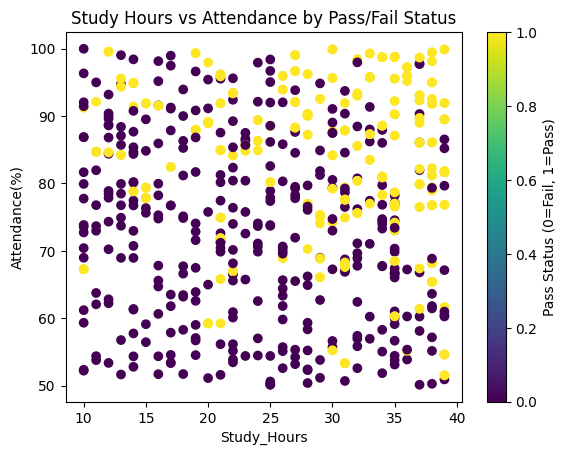

In [4]:
df["Pass_num"] = df["Pass"].map({"Fail": 0, "Pass": 1})

plt.scatter(df["Study_Hours"], df["Attendance"], c=df["Pass_num"]) # Color points by Pass_num
plt.xlabel("Study_Hours")
plt.ylabel("Attendance(%)")
plt.title("Study Hours vs Attendance by Pass/Fail Status")
plt.colorbar(label='Pass Status (0=Fail, 1=Pass)') # Add a color bar for legend
plt.show()

# Step 5: Feature & Target Selection
- X: input features
- y: target variable

In [5]:
X = df[["Study_Hours", "Attendance"]]
y = df["Pass"]

# Step 6: Train-Test Split
- 80% training, 20% testing
- random_state ensures same output every time

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train Logistic Regression Model
- Creates logistic regression model
- Fits model on training data

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Step 8: Prediction
- Predicts Pass/Fail on unseen data

In [8]:
y_pred = model.predict(X_test)

# Step 9: Model Evaluation
- Accuracy → 88% correct predictions
- Confusion Matrix
    - True Pass
    - True Fail
    - False predictions

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7464788732394366

Confusion Matrix:
 [[52 19]
 [17 54]]


# Step 10: Insights
- Study Hours is the strongest predictor.
- Attendance improves pass probability.
- Logistic Regression performs well for binary classification.